In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

import unicodedata
def normalize_characters(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')


In [3]:
pg_stats = pd.read_csv('pergamestats.csv')
advanced_stats = pd.read_csv('advanced_stats.csv')
sal2023 = pd.read_csv('salaries2023.csv')
advanced_stats = advanced_stats.drop(['Pos', 'Age', 'Tm', 'G', 'MP'], axis=1)
col_list = advanced_stats.columns.tolist()
col_list.remove('\xa0')
col_list.remove('\xa0.1')

advanced_stats = advanced_stats[col_list]
advanced_stats['Player'] = advanced_stats['Player'].apply(normalize_characters)

pg_stats['Player'] = advanced_stats['Player'].apply(normalize_characters)

In [4]:
all_stats = pd.merge(sal2023, pg_stats, on='Player')
all_stats = pd.merge(all_stats, advanced_stats, on='Player')

In [5]:
all_stats['Player'] = all_stats['Player'].drop_duplicates(keep='first')
all_stats.dropna(inplace=True)
all_stats = all_stats[all_stats['G']>=20]
all_stats.rename(columns={'2022-2023': '2022-23 Salary'}, inplace=True)


all_stats_true = all_stats[all_stats['2022-23 Salary']>1000000]
len(all_stats)
len(all_stats_true)

len(all_stats.columns)

50

In [6]:
correlation_matrix1 = all_stats.corr()
x_labels=correlation_matrix.columns[1::2]
y_labels=correlation_matrix.columns[::2]

C:\Users\andre\AppData\Local\Temp\ipykernel_6908\184789412.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix1 = all_stats.corr()


NameError: name 'correlation_matrix' is not defined

In [7]:
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', annot_kws={"size": 3})
plt.xticks(ticks=np.arange(1.5, len(correlation_matrix.columns), 2), labels=x_labels, rotation=60)
plt.yticks(ticks=np.arange(0.5, len(correlation_matrix.columns), 2), labels=y_labels, rotation=0)
plt.title('Correlation Matrix of Player Stats\nwith Salary 2022-2023', y =1.02)
plt.savefig('figures/Correlation Matrix 1.png', bbox_inches='tight')

plt.show()

NameError: name 'correlation_matrix' is not defined

In [8]:
correlations_with_salary = correlation_matrix['2022-2023']

# Sort the correlations in descending order to find the strongest ones
sorted_correlations = correlations_with_salary.abs().sort_values(ascending=False)

sorted_correlations = sorted_correlations.head(17)
sorted_correlations = sorted_correlations.tail(16)

NameError: name 'correlation_matrix' is not defined

In [9]:
sorted_correlations
df = sorted_correlations.reset_index()

# Rename the columns
df.columns = ['Feature', 'Correlation Coeff.']
df

NameError: name 'sorted_correlations' is not defined

In [10]:
sorted_features1 = sorted_correlations.index.tolist()

NameError: name 'sorted_correlations' is not defined

In [11]:
sorted_stats1 = all_stats[sorted_features1]
sorted_stats1 = sorted_stats1.rename(columns={'PTS': 'PPG'})

NameError: name 'sorted_features1' is not defined

In [12]:
correlation_matrix1 = sorted_stats1.corr()

NameError: name 'sorted_stats1' is not defined

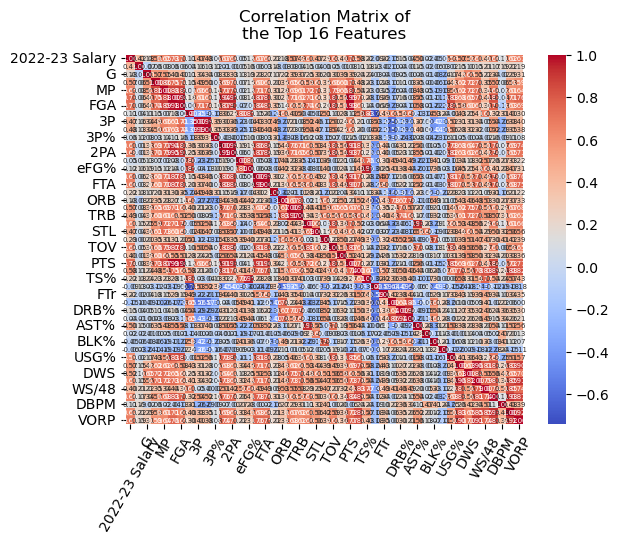

In [13]:

cmap = {'2D68C4': (45, 104, 196), '#F2A900': (242, 169, 0), '#C9082A': (201, 8, 42)}

sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 5})
plt.xticks(rotation=60)
plt.title('Correlation Matrix of\nthe Top 16 Features', y =1.02)
plt.savefig('figures/Correlation Matrix 2.png', bbox_inches='tight')

plt.show()

In [14]:
sorted_features2 = ['PTS', 'TOV', 'AST', 'VORP', 'PER']
sorted_stats2 = all_stats[sorted_features2]
sorted_stats2 = sorted_stats2.rename(columns={'PTS' : 'PPG'})

In [15]:
correlation_matrix2 = sorted_stats2.corr()

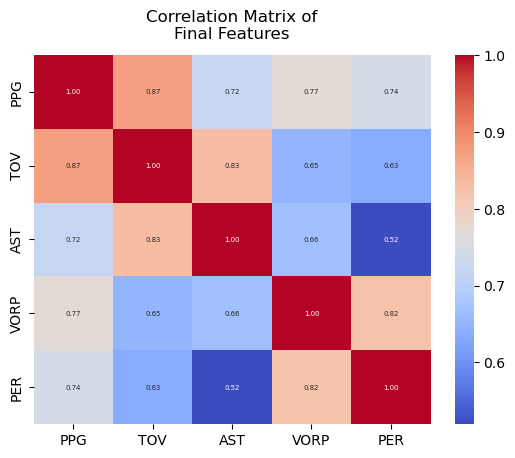

In [16]:
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 5})
plt.title('Correlation Matrix of\nFinal Features', y= 1.02)
plt.savefig('figures/Correlation Matrix Final.png', bbox_inches='tight')

plt.show()

In [151]:
X = all_stats[sorted_features2]
y = all_stats['2022-23 Salary']/1000000

In [152]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 4.881588488866972


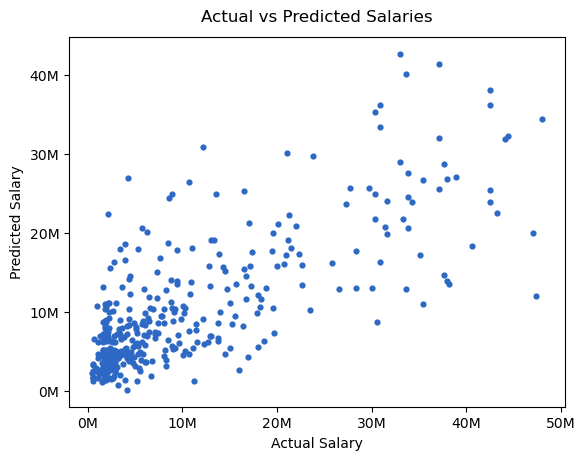

In [20]:
from matplotlib.ticker import FuncFormatter
def format_ticks_million(x, pos):
    return f'{int(x)}M'

# Apply the custom tick formatter to both x and y axes
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks_million))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks_million))

plt.title('Actual vs Predicted Salaries', y= 1.02)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
predictions = model.predict(X_standardized)

plt.scatter(y, predictions, c='#2D68C4', s=12)
plt.savefig('figures/Model Scatter.png', bbox_inches='tight')


plt.show()

In [21]:
all_stats['Predictions'] = predictions

In [22]:
checker = LinearRegression()
checker.fit(predictions.reshape(-1,1), y)

LinearRegression()

In [23]:
all_stats['Diffs'] = all_stats['Predictions']-y

In [24]:
pd.set_option('display.max_columns', 100)
all_stats[all_stats['Age']>24].sort_values(by='Diffs').tail(20)

,Player,2022-23 Salary,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Predictions,Diffs
367,Kyle Anderson,8780488,PF,29,MIN,69,46,28.4,3.7,7.2,0.509,0.6,1.5,0.410,3.0,5.7,0.536,0.553,1.4,2.0,0.735,1.0,4.4,5.3,4.9,1.1,0.9,1.5,2.1,9.4,14.8,0.583,0.212,0.275,3.8,16.9,10.5,22.6,1.9,2.8,15.7,14.4,2.5,2.6,5.1,0.125,0.2,2.3,2.5,2.2,14.032317,5.251829
411,Bruce Brown,6479000,SF,26,DEN,80,31,28.5,4.5,9.3,0.483,1.1,3.2,0.358,3.3,6.1,0.548,0.545,1.5,1.9,0.758,0.8,3.3,4.1,3.4,1.1,0.6,1.5,2.4,11.5,13.3,0.571,0.343,0.206,3.3,13.0,8.3,15.7,1.9,2.0,13.2,17.8,1.7,2.6,4.3,0.090,-1.1,0.6,-0.5,0.9,11.872828,5.393828
862,Gabe Vincent,1815677,PG,26,MIA,68,34,25.9,3.4,8.3,0.402,1.7,5.1,0.334,1.6,3.2,0.512,0.505,1.0,1.1,0.872,0.4,1.7,2.1,2.5,0.9,0.1,1.4,2.3,9.4,9.0,0.533,0.617,0.138,1.7,8.1,4.8,13.9,1.8,0.3,13.3,17.5,-0.3,1.7,1.4,0.038,-3.1,-0.3,-3.4,-0.6,7.276304,5.460627
822,Jalen McDaniels,1930681,SF,25,TOT,80,24,23.9,3.5,7.7,0.455,1.0,2.9,0.332,2.6,4.8,0.530,0.518,1.5,1.7,0.841,0.8,3.5,4.3,1.6,1.0,0.4,1.2,2.6,9.4,11.8,0.557,0.376,0.224,3.6,16.3,9.9,9.6,2.1,1.6,12.1,17.2,0.5,2.2,2.7,0.068,-2.7,0.6,-2.1,-0.1,7.443618,5.512937
846,Keita Bates-Diop,1878720,PF,27,SAS,67,42,21.7,3.5,6.9,0.508,0.8,2.1,0.394,2.7,4.8,0.557,0.568,1.8,2.2,0.793,1.0,2.7,3.7,1.5,0.7,0.3,0.8,0.9,9.7,14.9,0.609,0.305,0.323,4.7,14.3,9.3,9.8,1.5,1.1,9.5,16.7,2.1,0.6,2.7,0.089,0.3,-0.9,-0.6,0.5,7.406959,5.528239
220,Jordan Clarkson,13340000,SG,30,UTA,61,61,32.6,7.5,16.9,0.444,2.5,7.5,0.338,5.0,9.4,0.530,0.519,3.3,4.0,0.816,1.2,2.9,4.0,4.4,0.5,0.2,3.0,2.0,20.8,14.7,0.558,0.445,0.238,4.0,9.3,6.7,20.9,0.8,0.6,14.0,27.8,0.9,0.8,1.7,0.042,1.0,-2.4,-1.4,0.3,19.070805,5.730805
978,Anthony Lamb,694878,SF,25,GSW,62,4,19.3,2.4,5.1,0.471,1.2,3.2,0.367,1.2,1.9,0.652,0.588,0.7,1.0,0.767,0.9,2.6,3.5,1.5,0.5,0.3,0.9,2.2,6.7,10.9,0.610,0.634,0.191,5.3,14.4,9.9,10.5,1.1,1.5,13.7,13.8,1.2,1.2,2.4,0.096,-1.6,0.4,-1.1,0.3,6.501980,5.807102
100,Julius Randle,23760000,PF,28,NYK,77,77,35.5,8.5,18.6,0.459,2.8,8.3,0.343,5.7,10.3,0.553,0.536,5.2,6.9,0.757,1.8,8.1,10.0,4.1,0.6,0.3,2.8,3.0,25.1,20.3,0.581,0.444,0.371,5.6,25.2,15.4,18.5,0.9,0.7,11.5,29.5,5.0,3.1,8.1,0.142,3.9,-0.2,3.7,3.9,29.705996,5.945996
222,Kyle Kuzma,13000000,PF,27,WAS,64,64,35.0,8.0,17.8,0.448,2.5,7.5,0.333,5.5,10.3,0.533,0.518,2.7,3.7,0.730,0.9,6.4,7.2,3.7,0.6,0.5,3.0,2.3,21.2,14.3,0.544,0.421,0.208,2.8,19.5,11.5,16.5,0.8,1.1,13.2,27.9,-1.0,1.9,0.9,0.019,-0.2,-1.5,-1.7,0.2,19.117127,6.117127
870,Naji Marshall,1782621,SF,25,NOP,77,21,23.3,3.2,7.4,0.433,0.9,2.8,0.303,2.4,4.6,0.513,0.490,1.8,2.3,0.789,0.6,3.0,3.6,2.5,0.7,0.2,1.3,1.5,9.1,11.4,0.539,0.382,0.306,3.0,14.6,8.8,14.4,1.5,0.7,13.0,17.8,0.5,2.0,2.5,0.068,-1.9,0.0,-1.9,0.1,8.218767,6.436146


In [25]:
X_true = all_stats_true[sorted_features2]
y_true = all_stats_true['2022-23 Salary']/1000000

In [26]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_true).copy()
X_true['ASTsq'] = np.array(X_true['AST'])**2
X_true['VORPsq'] = np.array(X_true['VORP'])**2

# Add a constant column
X_true.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_6908\3081560685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_true['ASTsq'] = np.array(X_true['AST'])**2
C:\Users\andre\AppData\Local\Temp\ipykernel_6908\3081560685.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_true['VORPsq'] = np.array(X_true['VORP'])**2


,PTS,TOV,AST,VORP,PER,ASTsq,VORPsq
0,29.4,3.2,6.3,4.7,24.1,39.69,22.09
1,11.4,2.4,5.2,0.1,13.6,27.04,0.01
2,15.9,3.5,7.5,1.2,16.1,56.25,1.44
11,28.9,3.2,6.8,4.0,23.9,46.24,16.00
12,29.1,3.3,5.0,3.9,25.9,25.00,15.21


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y_true, test_size=0.2, random_state=42)
from sklearn.metrics import mean_absolute_error

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_absolute_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 4.776163586355006


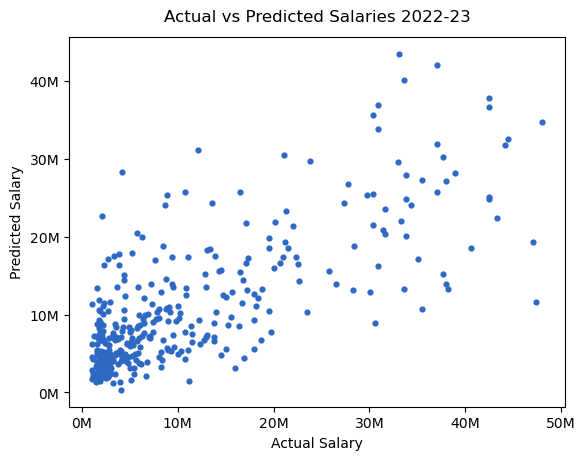

In [28]:
from matplotlib.ticker import FuncFormatter
def format_ticks_million(x, pos):
    return f'{int(x)}M'

# Apply the custom tick formatter to both x and y axes
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks_million))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks_million))

plt.title('Actual vs Predicted Salaries 2022-23', y= 1.02)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
predictions = model.predict(X_standardized)

plt.scatter(y_true, predictions, c='#2D68C4', s=12)
plt.savefig('figures/Model Scatter.png', bbox_inches='tight')


plt.show()

In [29]:
model.coef_

array([ 4.11333899,  1.50873306,  0.36872281,  4.0414588 , -1.15304632])

In [30]:
all_stats_true['Predicted Salary'] = predictions



C:\Users\andre\AppData\Local\Temp\ipykernel_6908\2245025724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_stats_true['Predicted Salary'] = predictions


In [31]:
all_stats_true.sort_values(by='Predicted Salary')
important = all_stats_true[['Player','2022-23 Salary', 'Predicted Salary']]
important['2022-23 Salary'] = important['2022-23 Salary']/1000000

C:\Users\andre\AppData\Local\Temp\ipykernel_6908\626530332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important['2022-23 Salary'] = important['2022-23 Salary']/1000000


In [32]:
sal24 = pd.read_csv('salaries_with_24.csv')
important = pd.merge(important, sal24, on='Player', how='outer')
important['2023-2024'] = important['2023-2024']/1000000
important = important[important['2022-23 Salary'].isna() == False]

In [33]:
important['Salary Difference'] = important['Predicted Salary']-(important['2022-23 Salary'])

In [34]:
important.sort_values(by='Salary Difference').head()

,Player,2022-23 Salary,Predicted Salary,2023-2024,Salary Difference
1,John Wall,47.345760,11.566571,NaN,-35.779189
2,Russell Westbrook,47.080179,19.255615,3.835738,-27.824564
12,Rudy Gobert,38.172414,13.237154,41.000000,-24.935260
20,Ben Simmons,35.448672,10.717610,37.893408,-24.731062
13,Khris Middleton,37.984276,13.851762,29.320988,-24.132514


In [35]:
important.sort_values(by='Predicted Salary').head()

,Player,2022-23 Salary,Predicted Salary,2023-2024,Salary Difference
220,Boban Marjanovic,4.101478,0.325569,2.891467,-3.775909
246,Dalen Terry,3.191400,1.175377,3.350760,-2.016023
226,Alex Len,3.918600,1.326889,3.196448,-2.591711
364,Christian Koloko,1.500000,1.357038,1.719864,-0.142962
330,Thanasis Antetokounmpo,1.878720,1.494034,2.346614,-0.384686


In [36]:
important['Weighted Difference'] = important['Salary Difference']/important['2022-23 Salary']

In [37]:
important.sort_values(by='Weighted Difference').tail()

,Player,2022-23 Salary,Predicted Salary,2023-2024,Salary Difference,Weighted Difference
216,Tyrese Haliburton,4.215120,28.326421,5.808435,24.111301,5.720193
285,Immanuel Quickley,2.316240,16.300369,4.171548,13.984129,6.037427
357,Austin Reaves,1.563518,13.436883,12.015150,11.873365,7.594006
305,Desmond Bane,2.130240,22.672589,3.845083,20.542349,9.643209
374,Kris Dunn,1.000001,11.351743,2.586484,10.351742,10.351732


In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge


def transform_features(x:np.ndarray, m:int):
    return PolynomialFeatures(m).fit_transform(x.reshape(-1, 1))
y_true = all_stats_true['2022-23 Salary']/1000000
features_true = all_stats_true[['PTS', 'TOV', 'AST', 'VORP', 'PER']]

X_train, X_test, y_train, y_test = train_test_split(features_true, y_true, test_size=0.4, random_state=1)

for feature in ['PTS', 'TOV', 'AST', 'VORP', 'PER']:
    x_train = np.array(X_train[feature])

    for degree in range(5):
        features_train = transform_features(x_train, degree)
        
        Model = Ridge(alpha=0)
        Model.fit(features_train, y_train)
        
        y_predict = Model.predict(features_train)
    
        mae = mean_squared_error(y_train,y_predict)
        
        print(f'Feature: {feature}, Degree: {degree}, MAE: {mae}')
        
        

Feature: PTS, Degree: 0, MAE: 123.01838074794883
Feature: PTS, Degree: 1, MAE: 58.67650179682358
Feature: PTS, Degree: 2, MAE: 58.29370809540119
Feature: PTS, Degree: 3, MAE: 58.24874637429703
Feature: PTS, Degree: 4, MAE: 58.24362983480283
Feature: TOV, Degree: 0, MAE: 123.01838074794883
Feature: TOV, Degree: 1, MAE: 61.96703104126708
Feature: TOV, Degree: 2, MAE: 61.67240074452081
Feature: TOV, Degree: 3, MAE: 60.84023385973014
Feature: TOV, Degree: 4, MAE: 60.71690097307409
Feature: AST, Degree: 0, MAE: 123.01838074794883
Feature: AST, Degree: 1, MAE: 74.90053495962927
Feature: AST, Degree: 2, MAE: 72.48183519691594
Feature: AST, Degree: 3, MAE: 69.89122245037179
Feature: AST, Degree: 4, MAE: 69.85338518164319
Feature: VORP, Degree: 0, MAE: 123.01838074794883
Feature: VORP, Degree: 1, MAE: 68.16034918966592
Feature: VORP, Degree: 2, MAE: 66.39484563226537
Feature: VORP, Degree: 3, MAE: 65.64345508300237
Feature: VORP, Degree: 4, MAE: 65.15181103932065
Feature: PER, Degree: 0, MAE: 1

In [39]:
important.rename(columns={'2023-2024':'2023-24 Salary'}, inplace=True)

In [40]:
important = important[['Player','2022-23 Salary','Predicted Salary','Salary Difference','Weighted Difference','2023-24 Salary']]

In [41]:

testing = important[important['2023-2024'].isna() == False]
mean_absolute_error(testing['Predicted Salary'], testing['2023-2024'])


KeyError: '2023-2024'

In [ ]:
important.sort_values(by='Predicted Salary')[['Player','2022-23 Salary','Predicted Salary', 'Salary Difference']].tail(10)

In [ ]:
important.sort_values(by='Salary Difference')[['Player','2022-23 Salary','Predicted Salary', 'Salary Difference', '2023-24 Salary']].tail(10)

In [ ]:
important.sort_values(by='Salary Difference')[['Player','2022-23 Salary','Predicted Salary', 'Salary Difference', '2023-24 Salary']].head(10)

In [ ]:
important.sort_values(by='Weighted Difference')[['Player','2022-23 Salary','Predicted Salary', 'Weighted Difference', '2023-24 Salary']].tail(10)

In [42]:
all_stats_true.sort_values(by='Predicted Salary')
importantnr = all_stats_true[['Player','2022-23 Salary', 'Predicted Salary']]
importantnr['2022-23 Salary'] = importantnr['2022-23 Salary']/1000000

C:\Users\andre\AppData\Local\Temp\ipykernel_6908\1012526911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importantnr['2022-23 Salary'] = importantnr['2022-23 Salary']/1000000


In [43]:
importantnr = importantnr[all_stats_true['Age']>24]

In [44]:
importantnr = pd.merge(importantnr, sal24, on='Player', how='outer')
importantnr['2023-2024'] = importantnr['2023-2024']/1000000
importantnr = importantnr[importantnr['2022-23 Salary'].isna() == False]

In [45]:
importantnr['Salary Difference'] = importantnr['Predicted Salary']-(importantnr['2022-23 Salary'])

In [46]:
importantnr['Weighted Difference'] = importantnr['Salary Difference']/importantnr['2022-23 Salary']

In [47]:
importantnr.rename(columns={'2023-2024': '2023-24 Salary'}, inplace=True)

In [48]:
importantnr.sort_values(by='Weighted Difference').tail(10)[['Player', '2022-23 Salary', 'Predicted Salary', 'Weighted Difference', '2023-24 Salary']]

,Player,2022-23 Salary,Predicted Salary,Weighted Difference,2023-24 Salary
201,Jalen McDaniels,1.930681,7.390981,2.828173,4.516000
212,Gabe Vincent,1.815677,7.142612,2.933856,10.500000
207,Keita Bates-Diop,1.878720,7.816996,3.160810,2.346614
218,Sam Hauser,1.637966,7.045008,3.301071,1.927896
221,Eugene Omoruyi,1.013119,4.608946,3.549264,0.559782
216,Naji Marshall,1.782621,8.248353,3.627093,1.930681
200,Terance Mann,1.930681,9.049822,3.687373,10.576923
206,Moritz Wagner,1.878720,8.990979,3.785694,8.000000
213,Max Strus,1.815677,9.292722,4.118048,14.487684
222,Kris Dunn,1.000001,11.351743,10.351732,2.586484


In [114]:
current_stats = pd.read_csv('current.csv')
sorted_features2 = ['Player','PTS', 'TOV', 'AST', 'VORP', 'PER']

In [115]:
curr_features = sorted_features2
curr_features.append('2023-2024')
current_stats = current_stats[curr_features]

In [118]:
current_stats.dropna(inplace=True)
current_stats
current_stats.loc[len(current_stats)] = ['Jaime Jaquez Jr.', 14.0, 1.7, 2.7, .1, 13.8, 1000000]

In [119]:
sorted_features2 = ['PTS', 'TOV', 'AST', 'VORP', 'PER']
X_curr = current_stats[sorted_features2]
y_curr = current_stats['2023-2024']/1000000

In [120]:
scaler = StandardScaler()
X_curr_stand = scaler.fit_transform(X_curr)
X_curr_stand

array([[ 2.54529543,  2.5577913 ,  1.53346836,  2.55478292,  1.18340812],
       [ 2.85525258,  2.79947924,  2.01256312,  2.9993954 ,  1.64902785],
       [ 2.3762279 ,  2.31610336,  3.76924389,  7.74192856,  2.85963915],
       ...,
       [-0.41338639, -0.46330792, -0.11674692, -0.70570862, -0.95844263],
       [-1.21645718, -1.18837174, -1.07493643, -0.55750446, -5.04037559],
       [-0.97694484,  0.38259986, -0.38291067, -0.70570862, -2.7277976 ]])

In [121]:
pred_curr = model.predict(X_curr_stand)

In [122]:
current_stats['Predictions'] = pred_curr

In [123]:
current_stats = current_stats.sort_values(by='Predictions', ascending=False)

In [124]:
current_stats.head(10)

,Player,PTS,TOV,AST,VORP,PER,2023-2024,Predictions
2,Nikola Jokic,25.5,2.9,9.1,5.5,31.3,47607350.0,53.083255
17,Luka Doncic,33.6,3.9,9.1,3.6,27.6,40064220.0,48.882528
4,Joel Embiid,35.1,3.8,6.1,3.6,34.4,47607350.0,47.763723
34,Shai Gilgeous-Alexander,31.0,1.9,6.3,4.1,30.7,33386850.0,45.619773
8,Giannis Antetokounmpo,31.2,3.6,5.9,3.4,29.5,45640084.0,44.778653
3,LeBron James,24.7,3.4,7.5,2.8,22.9,47607350.0,38.548510
265,Tyrese Haliburton,23.6,2.6,12.5,3.0,26.3,5808435.0,38.023323
1,Kevin Durant,28.9,3.3,5.8,2.3,23.5,47649433.0,37.364341
15,Trae Young,27.5,4.2,10.9,1.8,21.2,40064220.0,36.611734
36,Jayson Tatum,27.1,2.7,4.5,2.4,21.9,32600060.0,35.857397


In [136]:
current_stats[current_stats['Player']=='Brandon Miller']

,Player,PTS,TOV,AST,VORP,PER,2023-2024,Predictions
180,Brandon Miller,13.9,1.6,2.2,-0.8,10.0,10880364.0,8.713539


In [132]:
current_stats[current_stats['Player']=='Alperen Sengun']

,Player,PTS,TOV,AST,VORP,PER,2023-2024,Predictions
350,Alperen Sengun,21.6,2.6,4.8,2.3,22.5,3536280.0,31.840226


In [143]:
rookies = ['Victor Wembanyama', 'Chet Holmgren', 'Jaime Jaquez Jr.']

In [144]:
current_stats[current_stats['Player'].isin(rookies)][['Player', 'PTS', 'TOV', 'AST', 'VORP', 'PER','Predictions']]

,Player,PTS,TOV,AST,VORP,PER,Predictions
185,Chet Holmgren,17.4,1.7,2.8,1.9,20.9,25.263252
143,Victor Wembanyama,19.6,3.1,3.0,1.1,21.3,24.266693
554,Jaime Jaquez Jr.,14.0,1.7,2.7,0.1,13.8,13.762553


In [148]:
current_stats[current_stats['Player'].isin(['Kris Dunn', 'Max Strus'])]

,Player,PTS,TOV,AST,VORP,PER,2023-2024,Predictions
126,Max Strus,13.1,1.7,3.8,0.2,10.4,14487684.0,14.664315
411,Kris Dunn,5.0,1.3,4.1,0.4,13.3,2586484.0,9.978685


In [149]:
current_stats[current_stats['Player']=='Bradley Beal']

,Player,PTS,TOV,AST,VORP,PER,2023-2024,Predictions
5,Bradley Beal,17.9,2.3,3.9,0.0,15.2,46741590.0,16.502667
